In [262]:
import pandas as pd
from numpy import unique, where
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing
from matplotlib import pyplot as plt
pd.set_option('display.max_rows', 500)

In [263]:
data = pd.read_csv('model data.csv')
original_df = pd.DataFrame.copy(data)
data

,recording,Source,age,sex,diagnosis,other problems,epoches,w%,n1%,n2%,n3%,rem%
0,1,isruc-1,64.0,M,SAOS,Depression,880,30.000000,8.300000,22.050000,26.250000,13.410000
1,2,isruc-1,52.0,M,SAOS,Restless leg syndrome,964,25.410000,11.930000,35.790000,16.290000,10.580000
2,3,isruc-1,38.0,M,REM Sleep Behaviour Disorder,PLMS,943,14.000000,17.500000,26.090000,18.350000,24.070000
3,4,isruc-1,27.0,M,SRVAS,Epilepsy,963,2.910000,6.750000,44.240000,22.220000,23.880000
4,5,isruc-1,58.0,F,SAOS,Insomnia,875,33.830000,12.340000,30.290000,18.740000,4.800000
...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1103,SHHS,67.0,M,F,NaN,1000,20.000000,5.200000,57.300000,1.500000,16.000000
1089,1104,SHHS,58.0,F,F,NaN,760,4.342105,1.447368,44.868421,24.736842,24.605263
1090,1105,SHHS,63.0,M,F,NaN,840,25.833333,4.880952,47.500000,8.452381,13.333333
1091,1106,SHHS,68.0,F,F,NaN,1100,8.545455,7.727273,53.727273,8.818182,21.181818


In [264]:
X = data[['w%', 'n1%', 'n2%', 'n3%', 'rem%', 'age']].dropna()
y = data[['age']]

In [265]:
X = preprocessing.scale(X)
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=1000)

In [266]:
clf = MeanShift(bandwidth=bandwidth).fit(X)

In [267]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

In [268]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 4


In [269]:
original_df['cluster_group']=np.nan
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

C:\Users\baron\.conda\envs\BD4H\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


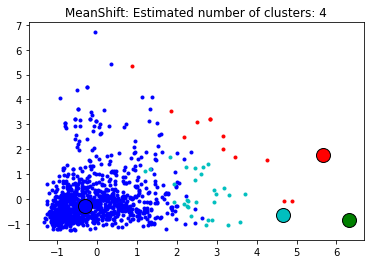

In [270]:
# for i in original_df[['age','cluster_group']]['cluster_group']:
#     print(i)
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('MeanShift: Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [271]:
original_df.to_csv('meanshift.csv')

In [ ]:
original_df